In [ ]:
Finding Correlation
Objectives
Identify the distribution of compensation data in the dataset.

Remove outliers to refine the dataset.

Identify correlations between various features in the dataset.

In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Step 3: Analyze and Visualize Compensation Distribution
Task: Plot the distribution and histogram for ConvertedCompYearly to examine the spread of yearly compensation among respondents.

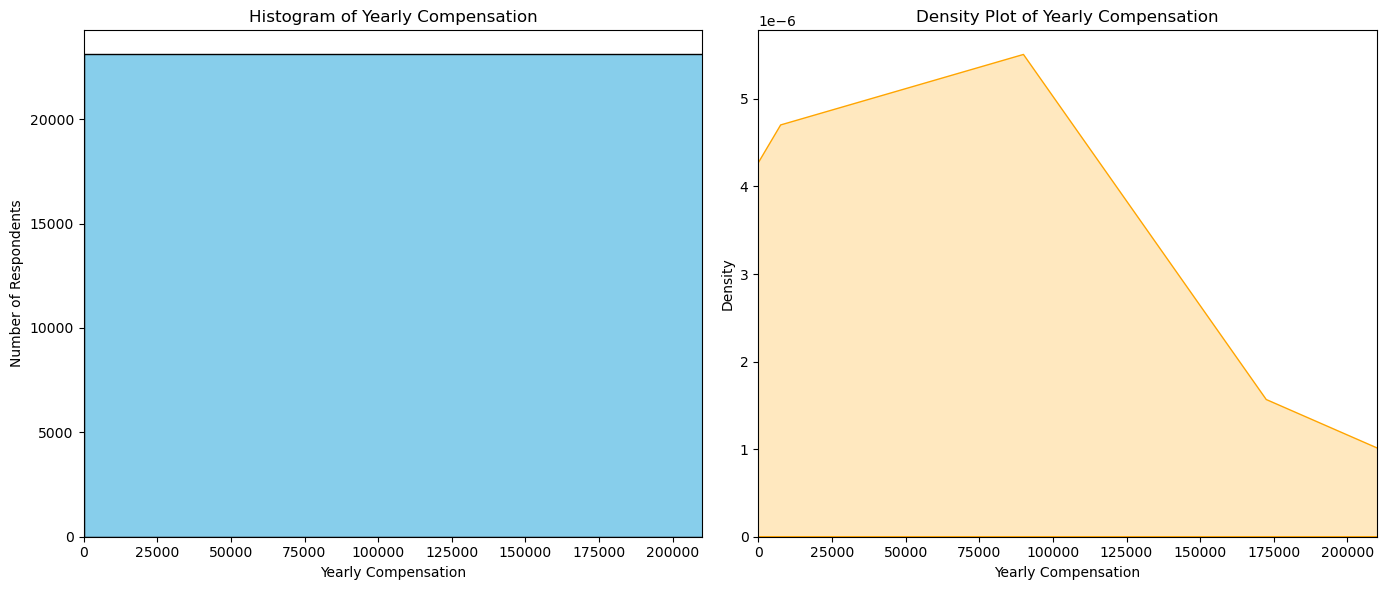

In [6]:
# Load the dataset
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Drop missing values for compensation for clean plotting
comp_data = df['ConvertedCompYearly'].dropna()

# Set up the figure with 2 plots side-by-side
plt.figure(figsize=(14,6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(comp_data, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.ylabel('Number of Respondents')
plt.xlim(0, comp_data.quantile(0.95))  # limit x-axis to 95th percentile to avoid extreme long tail

# Distribution plot (Kernel Density Estimate)
plt.subplot(1, 2, 2)
sns.kdeplot(comp_data, fill=True, color='orange')
plt.title('Density Plot of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.xlim(0, comp_data.quantile(0.95))

plt.tight_layout()
plt.show()

In [ ]:
Explanation:
clean the compensation data by dropping missing values.

The histogram shows frequency counts within bins — helps see the spread and skewness.

The density plot (KDE) gives a smooth estimate of the distribution shape.

The x-axis is limited to the 95th percentile to avoid extreme outliers stretching the plot.

In [ ]:
Step 4: Calculate Median Compensation for Full-Time Employees
Task: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."

In [7]:
print(df.columns)


Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)


In [8]:
# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation for full-time employees
median_comp_full_time = full_time_df['ConvertedCompYearly'].median()

print(f"Median yearly compensation for full-time employees: ${median_comp_full_time:,.2f}")


Median yearly compensation for full-time employees: $69,814.00


In [ ]:
Step 5: Analyzing Compensation Range and Distribution by Country
Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



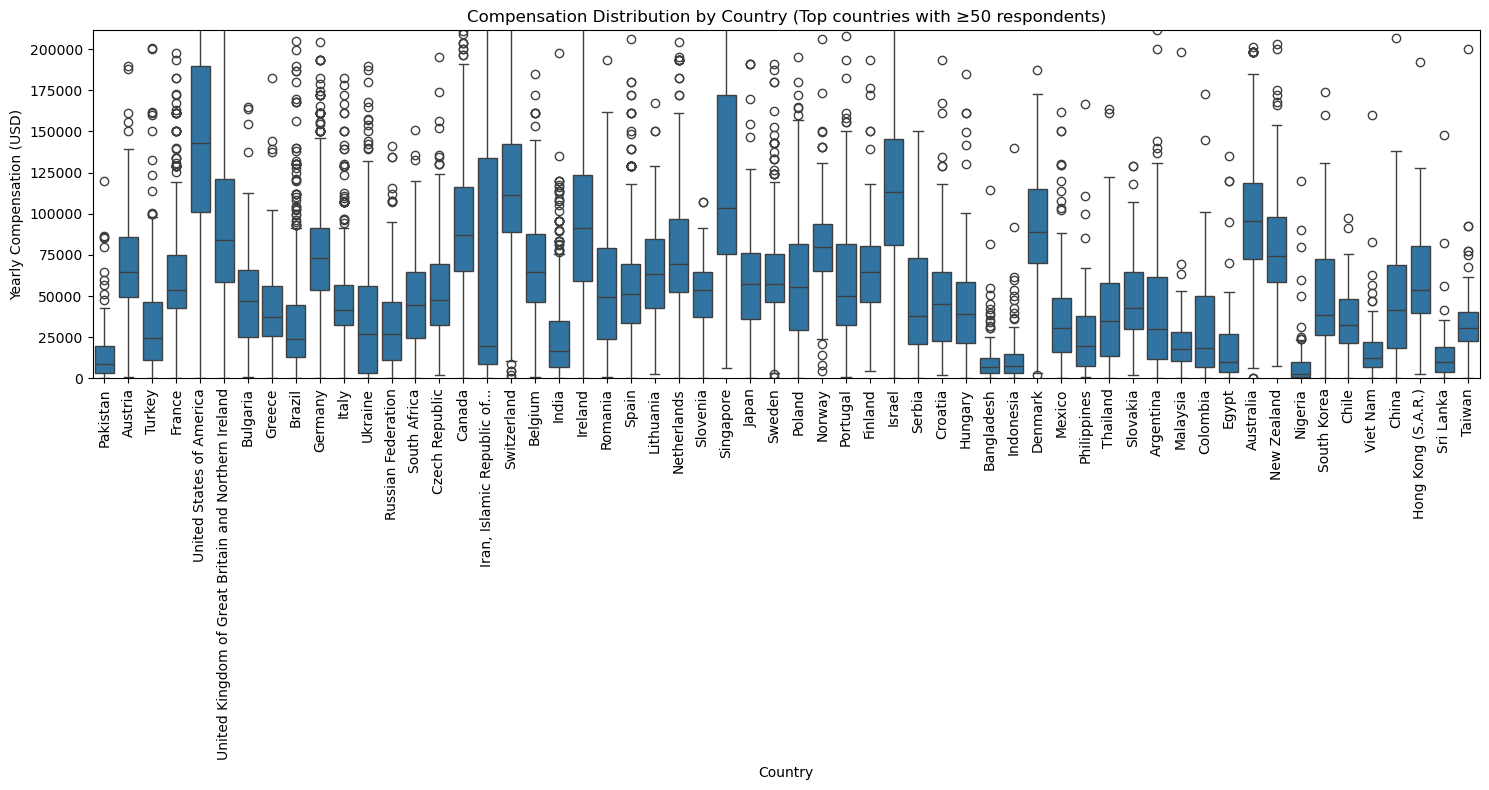

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, drop rows with missing compensation or country info
df_clean = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# To keep the plot readable, focus on countries with sufficient respondents, e.g., at least 50
country_counts = df_clean['Country'].value_counts()
top_countries = country_counts[country_counts >= 50].index

df_top_countries = df_clean[df_clean['Country'].isin(top_countries)]

# Plot boxplots of compensation by country
plt.figure(figsize=(15,8))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_countries)

plt.xticks(rotation=90)
plt.ylim(0, df_top_countries['ConvertedCompYearly'].quantile(0.95))  # Limit y-axis to 95th percentile to reduce outlier effect
plt.title('Compensation Distribution by Country (Top countries with ≥50 respondents)')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()


In [ ]:
Step 6: Removing Outliers from the Dataset
Task: Create a new DataFrame by removing outliers from the ConvertedCompYearly column to get a refined dataset for correlation analysis.

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Remove outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Lower Bound: -80177.25
Upper Bound: 220860.75
Original dataset size: 65437
Dataset size after removing outliers: 22457


In [ ]:
Step 7: Finding Correlations Between Key Variables¶
Task: Calculate correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1. Visualize these correlations with a heatmap.



In [ ]:
Check data types and clean if needed

In [14]:
# Check if columns exist
print(df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].head())

# Convert to numeric if necessary (coerce errors to NaN)
df_no_outliers.loc[:, 'WorkExp'] = pd.to_numeric(df_no_outliers['WorkExp'], errors='coerce')
df_no_outliers.loc[:, 'JobSatPoints_1'] = pd.to_numeric(df_no_outliers['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in any of these columns
corr_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()


     ConvertedCompYearly  WorkExp  JobSatPoints_1
72                7322.0      3.0            90.0
374              30074.0      NaN             NaN
379              91295.0      7.0             0.0
385              53703.0      NaN             NaN
389             110000.0      8.0            10.0


In [12]:
# Calculate correlation matrix
corr_matrix = corr_df.corr()
print(corr_matrix)


                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.406993       -0.059643
WorkExp                         0.406993  1.000000       -0.032388
JobSatPoints_1                 -0.059643 -0.032388        1.000000


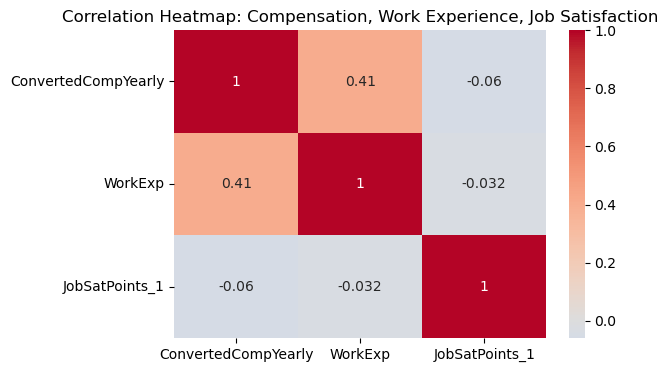

In [13]:
#Visualize with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap: Compensation, Work Experience, Job Satisfaction')
plt.show()


In [ ]:
Step 8: Scatter Plot for Correlations
Task: Create scatter plots to examine specific correlations between ConvertedCompYearly and WorkExp, as well as between ConvertedCompYearly and JobSatPoints_1.

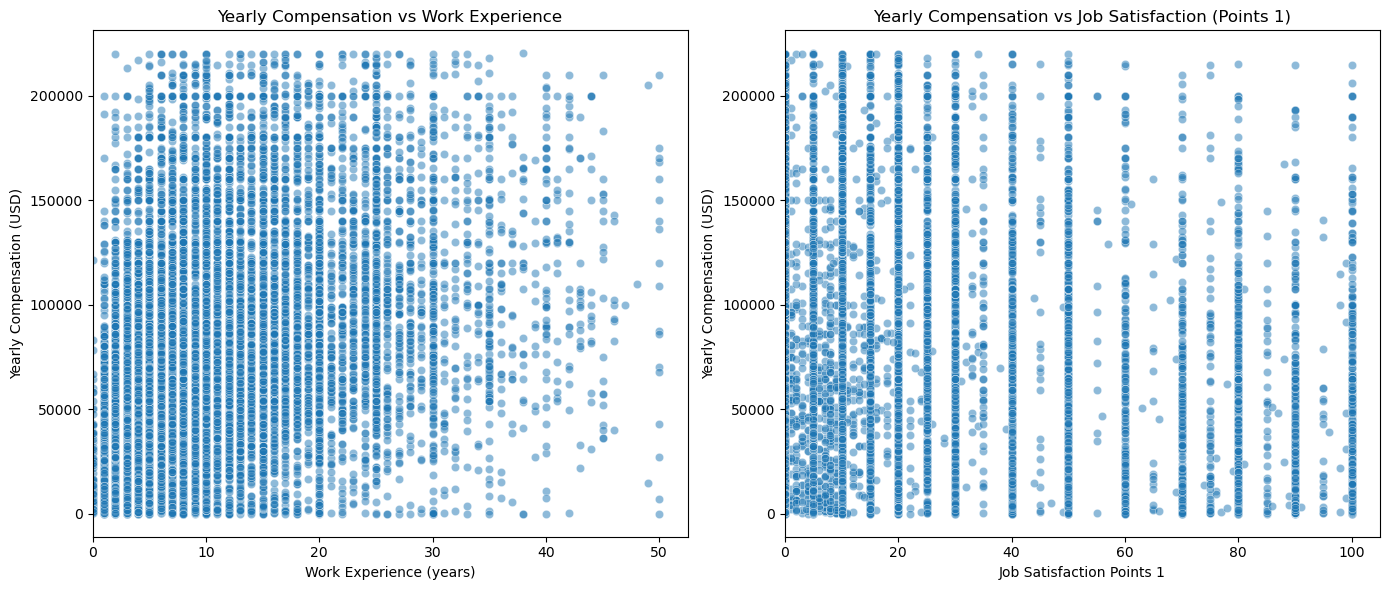

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure data is clean (from previous steps)
corr_df = df_no_outliers[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(14,6))

# Scatter plot: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=corr_df, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title('Yearly Compensation vs Work Experience')
plt.xlabel('Work Experience (years)')
plt.ylabel('Yearly Compensation (USD)')
plt.xlim(left=0)

# Scatter plot: Compensation vs Job Satisfaction Points 1
plt.subplot(1, 2, 2)
sns.scatterplot(data=corr_df, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5)
plt.title('Yearly Compensation vs Job Satisfaction (Points 1)')
plt.xlabel('Job Satisfaction Points 1')
plt.ylabel('Yearly Compensation (USD)')
plt.xlim(left=0)

plt.tight_layout()
plt.show()


In [ ]:
Explanation:
alpha=0.5 adds some transparency to points, useful if many overlap.
